In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, Ridge, SGDClassifier, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import warnings
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, SMOTENC, SVMSMOTE
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, Ridge, SGDClassifier, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import warnings

In [3]:
df = pd.read_csv("./carclaims.csv")


In [4]:
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No


In [5]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

In [6]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [8]:
df.corr()

/var/folders/5p/9czjm1nd4gv8kv10b824wbfc0000gn/T/ipykernel_1116/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275400,-0.004810,-0.007797,0.005283,-0.003993,-0.016817,-0.003906
WeekOfMonthClaimed,0.275400,1.000000,0.001859,0.011665,0.008908,0.005457,-0.000048,0.012175
Age,-0.004810,0.001859,1.000000,0.025944,-0.007063,0.069420,0.001668,0.025197
PolicyNumber,-0.007797,0.011665,0.025944,1.000000,0.008990,0.002133,-0.012312,0.936513
RepNumber,0.005283,0.008908,-0.007063,0.008990,1.000000,0.000509,0.011031,0.009338
Deductible,-0.003993,0.005457,0.069420,0.002133,0.000509,1.000000,0.003886,-0.001170
DriverRating,-0.016817,-0.000048,0.001668,-0.012312,0.011031,0.003886,1.000000,-0.013890
Year,-0.003906,0.012175,0.025197,0.936513,0.009338,-0.001170,-0.013890,1.000000


In [9]:
df.drop(['Make','WeekOfMonth','DayOfWeek','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','MaritalStatus','PolicyNumber','Days:Policy-Accident','AddressChange-Claim','Year',],axis = 1, inplace = True)

In [10]:
df['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [11]:
df['PastNumberOfClaims'].unique()

array(['none', '1', '2 to 4', 'more than 4'], dtype=object)

In [12]:
 df['AgeOfPolicyHolder'].unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [13]:
df['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [14]:
df['VehiclePrice'].unique()

array(['more than 69,000', '20,000 to 29,000', '30,000 to 39,000',
       'less than 20,000', '40,000 to 59,000', '60,000 to 69,000'],
      dtype=object)

In [15]:
df['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [16]:
import seaborn as sns

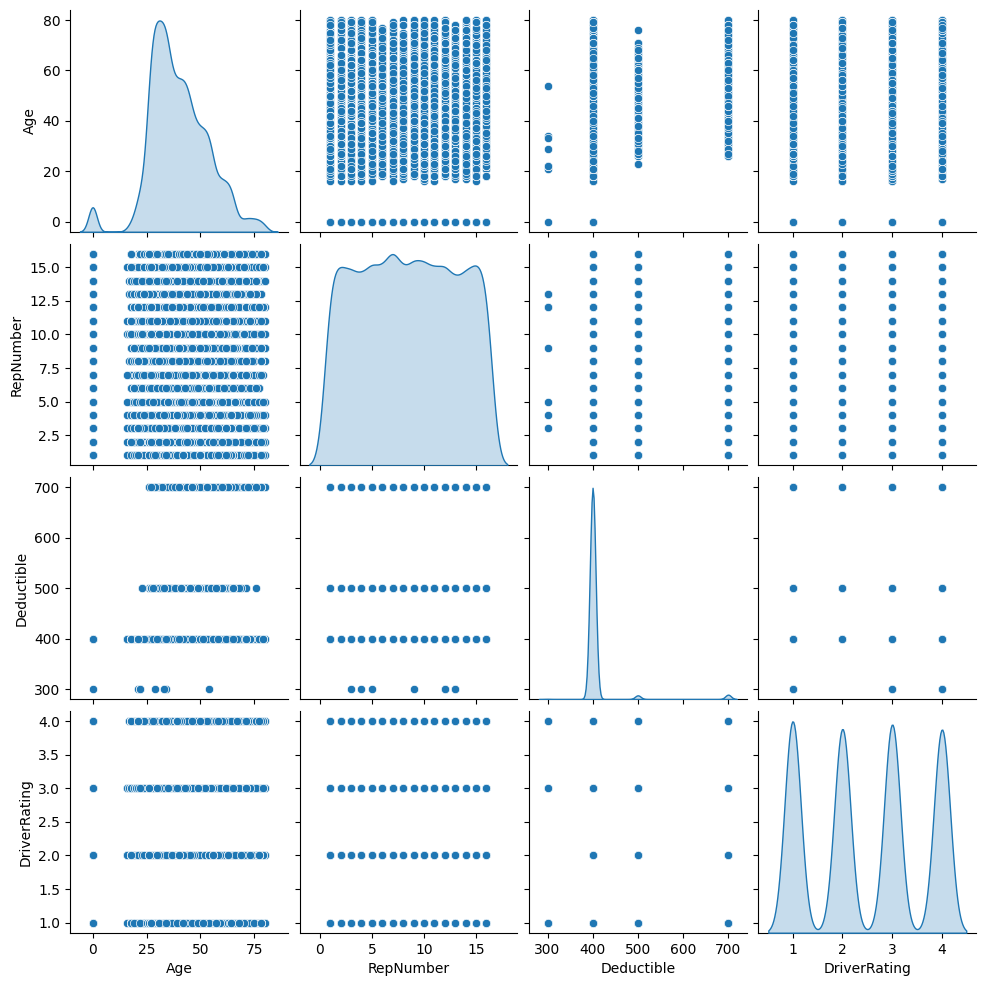

In [17]:
sns.pairplot(df, diag_kind='kde')

<AxesSubplot: xlabel='Fault', ylabel='Age'>

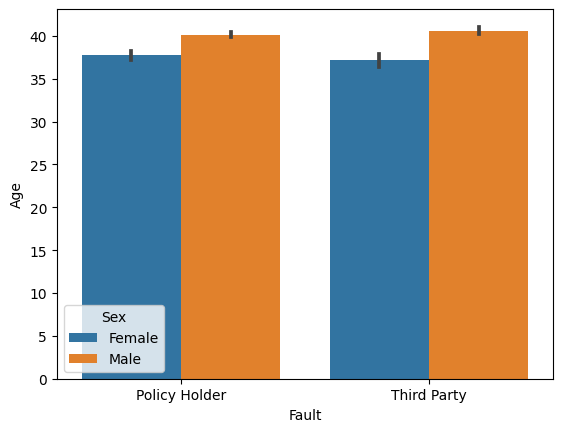

In [18]:
sns.barplot(x=df['Fault'],y=df['Age'],hue = df['Sex'])

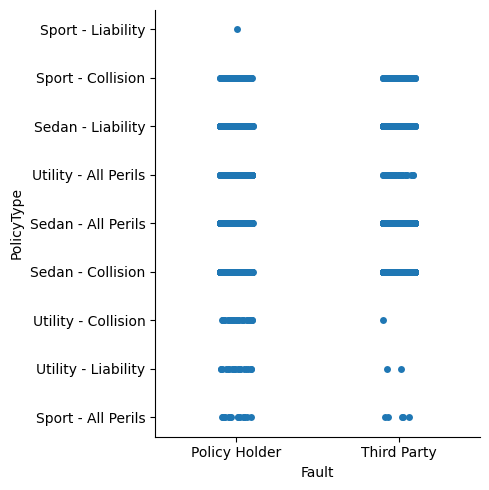

In [19]:
sns.catplot(x= 'Fault', y = 'PolicyType', data = df)

<AxesSubplot: xlabel='Deductible', ylabel='PolicyType'>

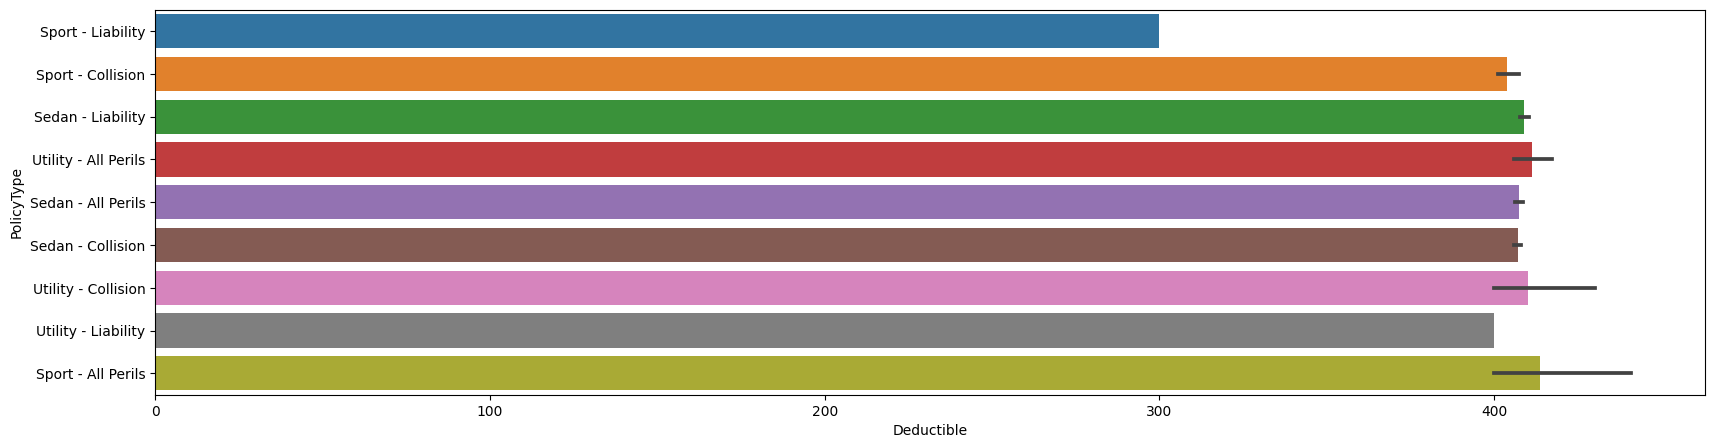

In [20]:
plt.figure(figsize=(20,5))
sns.barplot(x=df['Deductible'],y=df['PolicyType'])

<AxesSubplot: xlabel='VehicleCategory', ylabel='DriverRating'>

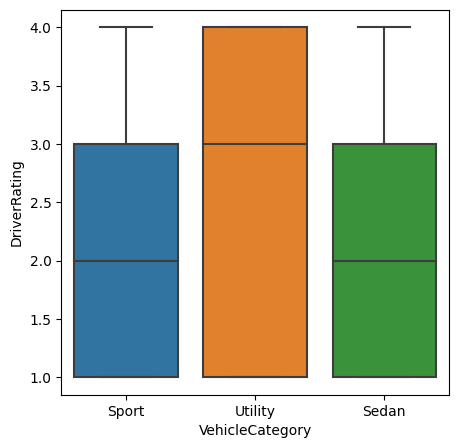

In [21]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df['VehicleCategory'],y=df['DriverRating'])

<AxesSubplot: xlabel='VehicleCategory', ylabel='VehiclePrice'>

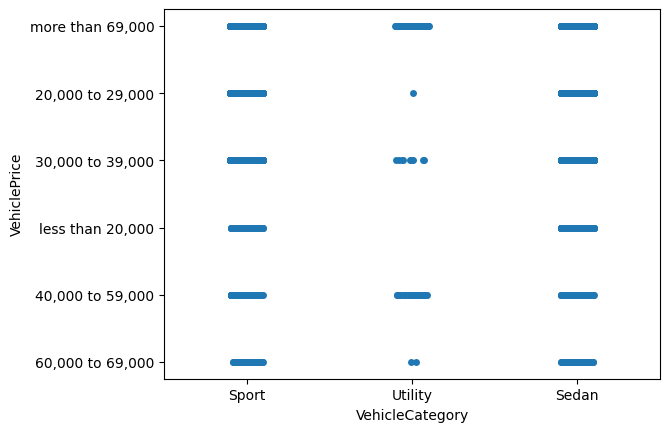

In [22]:
sns.stripplot(x= 'VehicleCategory',y = 'VehiclePrice', data = df)

<AxesSubplot: xlabel='PoliceReportFiled', ylabel='PolicyType'>

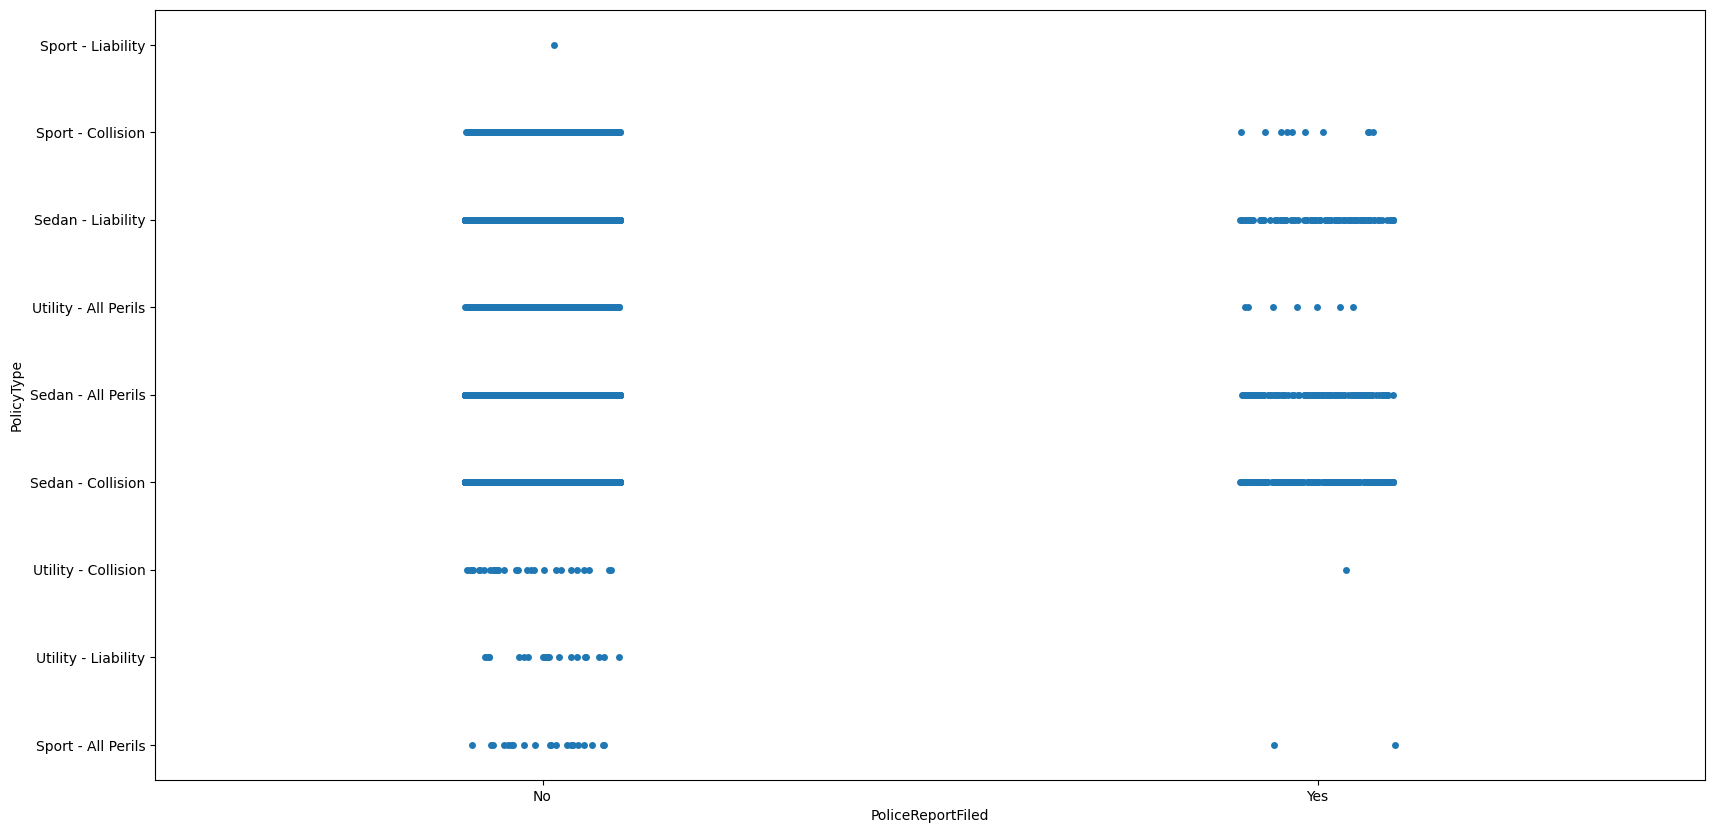

In [23]:
plt.figure(figsize=(20,10))
sns.stripplot(x= 'PoliceReportFiled',y = 'PolicyType', data = df)

<AxesSubplot: xlabel='PolicyType', ylabel='AgeOfPolicyHolder'>

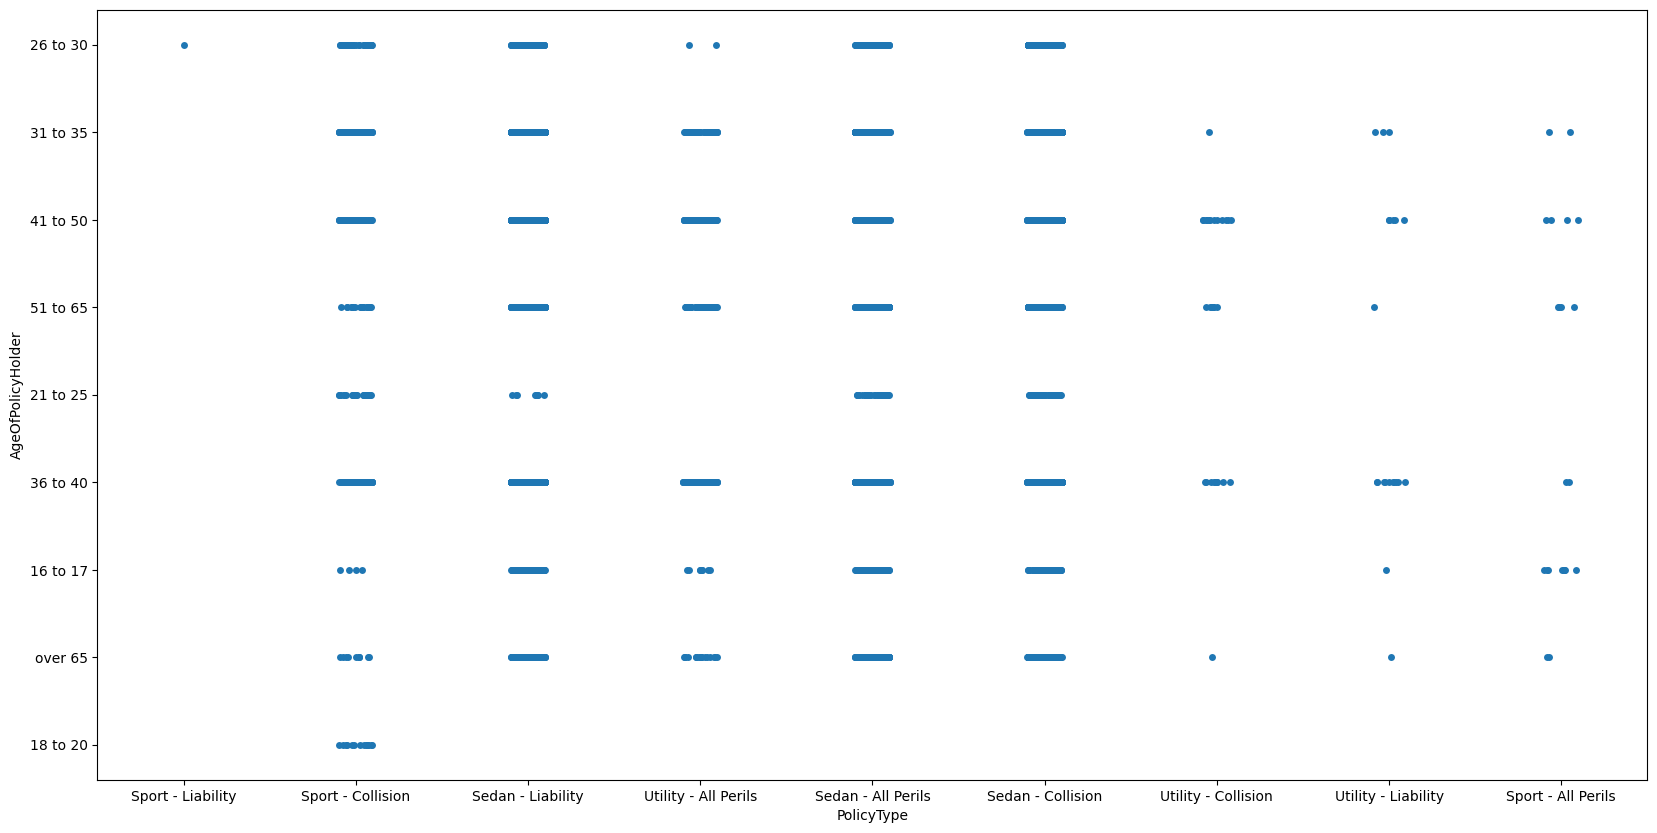

In [24]:
plt.figure(figsize=(20,10))
sns.stripplot(x=df['PolicyType'],y=df['AgeOfPolicyHolder'])

In [25]:
df['PastNumberOfClaims'] = df['PastNumberOfClaims'].map({'none':1,'1':1,'2 to 4':4 , 'more than 4':5})

In [26]:
df['AgeOfVehicle'] = df['AgeOfVehicle'].map({'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new': 0, '4 years':4, '2 years':2})

In [27]:
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].map({'26 to 30':2,'31 to 35':3,'41 to 50':4,
                                                       '51 to 65':6,'21 to 25':1,'36 to 40':5,'16 to 17':0,'over 65':7,'18 to 20':0})

In [28]:
df['NumberOfCars'].unique() 

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [29]:
df['FraudFound'] = df['FraudFound'].map({'yes':1,'No':0})

In [30]:
df.drop(['Month'] , axis = 1, inplace = True)

In [31]:
df.drop(['AccidentArea'],axis = 1, inplace = True)

In [32]:
df.drop(['VehicleCategory'],axis = 1, inplace= True)

In [33]:
df1 = pd.get_dummies(df, columns = ['Sex','PoliceReportFiled','Fault','PolicyType','WitnessPresent','AgentType','BasePolicy'],drop_first=True)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              15420 non-null  int64  
 1   VehiclePrice                     15420 non-null  object 
 2   RepNumber                        15420 non-null  int64  
 3   Deductible                       15420 non-null  int64  
 4   DriverRating                     15420 non-null  int64  
 5   Days:Policy-Claim                15420 non-null  object 
 6   PastNumberOfClaims               15420 non-null  int64  
 7   AgeOfVehicle                     15420 non-null  int64  
 8   AgeOfPolicyHolder                15420 non-null  int64  
 9   NumberOfSuppliments              15420 non-null  object 
 10  NumberOfCars                     15420 non-null  object 
 11  FraudFound                       14497 non-null  float64
 12  Sex_Male          

In [35]:
df1.corr()

/var/folders/5p/9czjm1nd4gv8kv10b824wbfc0000gn/T/ipykernel_1116/473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Age,RepNumber,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,FraudFound,Sex_Male,PoliceReportFiled_Yes,...,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,WitnessPresent_Yes,AgentType_Internal,BasePolicy_Collision,BasePolicy_Liability
Age,1.000000,-0.007063,0.069420,0.001668,-0.028042,0.682472,0.854955,NaN,0.073113,-0.008346,...,-0.017679,-0.045496,-0.011255,0.055779,0.031015,0.004566,-0.007280,-0.000319,-0.072228,-0.016014
RepNumber,-0.007063,1.000000,0.000509,0.011031,-0.001286,-0.005869,-0.001525,NaN,-0.000833,0.006107,...,0.016199,-0.004004,0.006157,0.004579,0.010079,0.000708,0.007521,0.005630,-0.011935,0.003231
Deductible,0.069420,0.000509,1.000000,0.003886,0.003980,0.091614,0.078519,NaN,0.014784,0.009005,...,0.005102,-0.013721,-0.019736,0.011863,0.002306,-0.006474,0.000586,-0.004244,-0.016765,0.018619
DriverRating,0.001668,0.011031,0.003886,1.000000,-0.001737,-0.002418,0.003380,NaN,-0.002788,0.015947,...,-0.005728,0.000485,-0.010704,0.009526,0.007054,-0.009809,0.010489,-0.000262,-0.007651,-0.000548
PastNumberOfClaims,-0.028042,-0.001286,0.003980,-0.001737,1.000000,-0.003478,-0.015889,NaN,-0.001799,-0.001636,...,0.005222,-0.097395,-0.007695,0.020696,0.018896,0.008083,-0.015209,0.000052,-0.127752,0.349034
AgeOfVehicle,0.682472,-0.005869,0.091614,-0.002418,-0.003478,1.000000,0.661278,NaN,0.102660,-0.001556,...,-0.054700,-0.062647,-0.019213,0.047734,0.019168,0.007950,-0.008419,0.020840,-0.021768,-0.010160
AgeOfPolicyHolder,0.854955,-0.001525,0.078519,0.003380,-0.015889,0.661278,1.000000,NaN,0.057942,-0.011701,...,-0.022487,-0.067705,-0.011784,0.054489,0.027313,0.010570,-0.002707,0.003866,-0.069375,0.002531
FraudFound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex_Male,0.073113,-0.000833,0.014784,-0.002788,-0.001799,0.102660,0.057942,NaN,1.000000,-0.007413,...,0.011585,0.018744,-0.018665,0.063571,0.019049,0.015933,-0.005585,0.012681,0.006469,-0.061632
PoliceReportFiled_Yes,-0.008346,0.006107,0.009005,0.015947,-0.001636,-0.001556,-0.011701,NaN,-0.007413,1.000000,...,0.014531,0.000906,-0.001361,-0.006552,0.001499,-0.006240,0.198096,0.023268,0.034467,-0.041331


In [36]:
df1['Days:Policy-Claim'].unique()

array(['more than 30', '15 to 30', '8 to 15', 'none'], dtype=object)

In [37]:
df1['Days:Policy-Claim'] = df['Days:Policy-Claim'].map({'more than 30':35,'15 to 30':25,'8 to 15':12,'none':0})

In [38]:
df1.drop(['NumberOfSuppliments'],axis = 1, inplace=True)

In [39]:
df1.drop(['VehiclePrice'],axis = 1, inplace=True)

In [40]:
df1.drop(['NumberOfCars'],axis = 1, inplace=True)

In [41]:
df1['FraudFound']=df1['FraudFound'].fillna(value = 1)

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
train = df1.drop('FraudFound',  axis = 1)
test = df1['FraudFound']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.19, random_state = 20)


CREATING A DICTIONARY FOR ALGORITHMS


In [45]:


algorithms = [
    ("Logistic Regression", LogisticRegression(max_iter=5000), {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]},),
    ("SGD", SGDClassifier(), {"loss": ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], "penalty": ['l1', 'l2', 'elasticnet']}),
    ("Passive Aggressive", PassiveAggressiveClassifier(), {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}),
    ("K-Nearest Neighbors", KNeighborsClassifier(), {"n_neighbors": [3, 5, 11, 19], "weights": ['uniform', 'distance']}),
    ("Decision Tree", DecisionTreeClassifier(), {"max_depth": [None, 10, 20, 30, 40]}),
    ("Extra Trees", ExtraTreesClassifier(), {"n_estimators": [10, 50, 100, 200], "max_depth": [None, 10, 20, 30, 40]}),
    ("Gradient Boosting", GradientBoostingClassifier(), {"n_estimators": [10, 50, 100, 200], "learning_rate": [0.01, 0.1, 1]}),
    ("Gaussian Naive Bayes", GaussianNB(), {}),
    ("Linear SVM", LinearSVC(), {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}),
    # ("SVM", SVC(), {"kernel": ['linear', 'poly', 'rbf', 'sigmoid'], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}),
    ("AdaBoost", AdaBoostClassifier(), {"n_estimators": [10, 50, 100, 200]}),
    ("Bagging", BaggingClassifier(), {"n_estimators": [10, 50, 100, 200]}),
    ("Random Forest", RandomForestClassifier(), {"n_estimators": [10, 50, 100, 200], "max_depth": [None, 10, 20, 30, 40]}),
    ("Linear Discriminant Analysis", LinearDiscriminantAnalysis(), {'tol': [1e-4, 1e-3, 1e-2]}),
    ("Quadratic Discriminant Analysis", QuadraticDiscriminantAnalysis(), {'reg_param': [0.0, 0.5, 1.0],'tol': [1e-4, 1e-3, 1e-2], })
]

MODEL WITH DEFAULT PARAMETERS

In [46]:
for name, model, model_params in algorithms:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    # Score the model on the test ses
    score = accuracy_score(y_test, y_pred)
    scores = cross_val_score(model, x_test, y_test, cv=5)
    print(f'{model.__class__.__name__} accuracy: {np.mean(scores):.3f}')
    print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
    warnings.filterwarnings("ignore")

warnings.filterwarnings("ignore")

LogisticRegression accuracy: 0.938
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      2748
         1.0       0.00      0.00      0.00       182

    accuracy                           0.94      2930
   macro avg       0.47      0.50      0.48      2930
weighted avg       0.88      0.94      0.91      2930

SGDClassifier accuracy: 0.761
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94      2748
         1.0       0.17      0.18      0.17       182

    accuracy                           0.90      2930
   macro avg       0.56      0.56      0.56      2930
weighted avg       0.90      0.90      0.90      2930

PassiveAggressiveClassifier accuracy: 0.938
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      2748
         1.0       0.00      0.00      0.00       182

 

FINDING THE BEST PARAMETERS FOR THE MODEl


In [47]:
for name, model, model_params in algorithms:
    clf = GridSearchCV(model, model_params, cv=5, scoring='accuracy')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    # Score the model on the test ses
    score = accuracy_score(y_test, y_pred)

    warnings.filterwarnings("ignore")
    print(f'{model} best parameters: {clf.best_params_}')
    scores = cross_val_score(clf, x_test, y_test, cv=5)
    print(f'{model.__class__.__name__} mean_accuracy: {np.mean(scores):.3f}')
    print(f"accuracy_score={score}")
    print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

    warnings.filterwarnings("ignore")

warnings.filterwarnings("ignore")


LogisticRegression(max_iter=5000) best parameters: {'C': 0.001}
LogisticRegression mean_accuracy: 0.938
accuracy_score=0.9378839590443686
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      2748
         1.0       0.00      0.00      0.00       182

    accuracy                           0.94      2930
   macro avg       0.47      0.50      0.48      2930
weighted avg       0.88      0.94      0.91      2930

SGDClassifier() best parameters: {'loss': 'hinge', 'penalty': 'l2'}
SGDClassifier mean_accuracy: 0.762
accuracy_score=0.9378839590443686
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      2748
         1.0       0.00      0.00      0.00       182

    accuracy                           0.94      2930
   macro avg       0.47      0.50      0.48      2930
weighted avg       0.88      0.94      0.91      2930

PassiveAggressiveClassi

APPLYING OVERSAMPLING TECHNIQUES


In [48]:
classifiers = {
    'smote': SMOTE(),
    'adasyn': ADASYN(),
    'RUS':RandomUnderSampler(),
    'ROS': RandomOverSampler()
    }

APPLYING OVERSAMPLING TECHNIQUES WITH MODELS WITH DEFAULT PARAMETERS.


In [49]:
for name, model,params in algorithms:
    print(name)
    for oversampling_name, technique in classifiers.items():
        print(f'Applying {oversampling_name}')
        X_res, y_res = technique.fit_resample(x_train, y_train)
        X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.3, random_state=42)
        print(f'Training {name} on {oversampling_name} resampled dataset')
        model.fit(X_train_res, y_train_res)
        predictions = model.predict(X_test_res)
        print(f'Accuracy: {accuracy_score(y_test_res, predictions)}')
        print(f'Classification Report: \n{classification_report(y_test_res, predictions)}')

Logistic Regression
Applying smote
Training Logistic Regression on smote resampled dataset
Accuracy: 0.8062411347517731
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.84      0.76      0.80      3536
         1.0       0.78      0.85      0.81      3514

    accuracy                           0.81      7050
   macro avg       0.81      0.81      0.81      7050
weighted avg       0.81      0.81      0.81      7050

Applying adasyn
Training Logistic Regression on adasyn resampled dataset
Accuracy: 0.811170966827332
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80      3529
         1.0       0.78      0.87      0.82      3525

    accuracy                           0.81      7054
   macro avg       0.82      0.81      0.81      7054
weighted avg       0.82      0.81      0.81      7054

Applying RUS
Training Logistic Regression on RUS resampled dataset
Accuracy: 

APPLYING OVERSAMPLING TECHNIQUES WITH MODELS AND FINDING THE BEST PARAMETERS.


In [50]:
for name, model,params in algorithms:
    for oversampling_name, technique in classifiers.items():
        print(f'Applying {oversampling_name} with {name}')
        X_res, y_res = technique.fit_resample(x_train, y_train)
        X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.3, random_state=42)
        clf = GridSearchCV(model,params, cv=5, scoring='accuracy')
        clf.fit(X_train_res, y_train_res)
        predictions = clf.predict(X_test_res)
        print(f'{model} best parameters: {clf.best_params_}')
        print(f'{model} accuracy: {clf.score(X_test_res, y_test_res)}')
        print(f'{model} estimator: {clf.best_estimator_}')
        print(f'{model} best score: {clf.best_score_}')
        print(f'Classification Report: \n{classification_report(y_test_res, predictions)}')
    scores = cross_val_score(clf, X_test_res, y_test_res, cv=5)
    print(f'{model.__class__.__name__} accuracy: {np.mean(scores):.3f}')
        

    

Applying smote with Logistic Regression
LogisticRegression(max_iter=5000) best parameters: {'C': 1000}
LogisticRegression(max_iter=5000) accuracy: 0.8056737588652483
LogisticRegression(max_iter=5000) estimator: LogisticRegression(C=1000, max_iter=5000)
LogisticRegression(max_iter=5000) best score: 0.8089735611289728
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.84      0.76      0.80      3536
         1.0       0.78      0.86      0.81      3514

    accuracy                           0.81      7050
   macro avg       0.81      0.81      0.81      7050
weighted avg       0.81      0.81      0.81      7050

Applying adasyn with Logistic Regression
LogisticRegression(max_iter=5000) best parameters: {'C': 100}
LogisticRegression(max_iter=5000) accuracy: 0.8120215480578395
LogisticRegression(max_iter=5000) estimator: LogisticRegression(C=100, max_iter=5000)
LogisticRegression(max_iter=5000) best score: 0.8125645146581512
Classification

classification report using model's best parameter and oversampling
